# Starting Computations

:::{admonition} Lesson Content
:class: note, dropdown

- Dataset
- Some computation
- Filtering and Masking values

:::

## Context

Yesterday we explored the data structures that `xarray` uses to organize data. Today we are going to use those datastructres to manipulate data!

In [3]:
import xarray as xr

## Dataset

The dataset of the day today is NOAA OISST. It is a sea surface temperature dataset that goes back to the 1980s.

- [NOAA NCEI Data listing](https://www.ncei.noaa.gov/products/optimum-interpolation-sst)
- [THREDDS Catalog](https://www.ncei.noaa.gov/thredds/catalog/OisstBase/NetCDF/V2.1/AVHRR/198210/catalog.html)

Different from yesterday, where we downloaded a copy of the dataset locally, we will access this data by URL. That means that we won't be downloading it directly. Instead of giving a filepath on our local computer, we are giving and URL from what is called a THREDDS Catalog, and xarray is able to read that.

In [4]:
sst = xr.open_dataset("https://www.ncei.noaa.gov/thredds/dodsC/OisstBase/NetCDF/V2.1/AVHRR/198210/oisst-avhrr-v02r01.19821007.nc")

sst

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440, time: 1, zlev: 1)
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * time     (time) datetime64[ns] 1982-10-07T12:00:00
  * zlev     (zlev) float32 0.0
Data variables:
    anom     (time, zlev, lat, lon) float32 ...
    err      (time, zlev, lat, lon) float32 ...
    ice      (time, zlev, lat, lon) float32 ...
    sst      (time, zlev, lat, lon) float32 ...
Attributes: (12/38)
    title:                           NOAA/NCEI 1/4 Degree Daily Optimum Inter...
    source:                          ICOADS, NCEP_GTS, GSFC_ICE, NCEP_ICE, Pa...
    id:                              oisst-avhrr-v02r01.19821007.nc
    naming_authority:                gov.noaa.ncei
    summary:                         NOAAs 1/4-degree Daily Optimum Interpola...
    cdm_data_type:                   Grid
    ...                              ...
    ncei_template_version:           NCEI_NetCDF_Grid_Template_v2.0
    comment:                         Data was converted from NetCDF-3 to NetC...
    sensor:                          Thermometer, AVHRR
    Conventions:                     CF-1.6, ACDD-1.3
    references:                      Reynolds, et al.(2007) Daily High-Resolu...
    DODS_EXTRA.Unlimited_Dimension:  time

:::{admonition} 📝 Check your understanding
:class: tip

What type of data structure is the `sst` object? What are the dimensions, how big is each one, and how many variables are there?

:::

Before we go on with our examples for the day, I'm going to do a bit of pre-processing on this data. I'm going to 1) take just the `sst` DataArray (`sst['sst']`), 2) get rid of the vertical depth dimension, `zlev`, since there is just 1 level for sst (the surface).

In [5]:
sst = sst['sst'].squeeze(dim='zlev', drop=True)

## Some Computation

### Arithmetic

In [6]:
sst_kelvin = sst + 273

:::{admonition} 🌀 More Info: Broadcasting during arithmetic
:class: note, dropdown

The reason that this works is because numpy (and therefore xarray) uses a technique called **broadcasting**. You can read more about it [here](https://xarray-contrib.github.io/xarray-tutorial/scipy-tutorial/03_computation_with_xarray.html#Broadcasting)

:::



### Aggregations

There are a lot (a lot) of built in **methods** that manipulate data. Some common ones are:

| Function      | Description |
| ----------- | ----------- |
| `.max()`      | Maximum      |
|  `.min()`   | Minimum        |
| `.std()`    |  Standard deviation |


In [7]:
sst.max()

<xarray.DataArray 'sst' ()>
array(33.21, dtype=float32)

In [8]:
sst.min()

<xarray.DataArray 'sst' ()>
array(-1.8, dtype=float32)

In an earlier lesson we talked about functions/methods as verbs and attributes as adjectives when describing a data object. The methods listed above are examples of these for xarray DataArray objects!

There are a lot of methods for DataArrays. One list (of many on the internet) is [here](https://www.pythonprogramming.in/numpy-aggregate-and-statistical-functions.html).

:::{note}
One way that programming langauges grow is when people build new tools by starting with the tools that someone else already built. This accelerates progress!

You'll notice that the link above lists functions that are part of the `numpy` library. `xarray` builds on top of `numpy`, so we can use resources that others have made for numpy to help us with xarray. While not every numpy function, a lot of the numpy functions are available for xarray.

:::

:::{admonition} 📝 Check your understanding
:class: tip

What is the mean value of the sst DataArray?

:::

### Reading documentation

To practice looking at documentation, let's look at [the docs page](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.max.html) for the `xarray.DataArray.max()` method.

We notice a few optional arguments - `dim` and `axis`. `dim` takes an integer as an argument and `axis` takes a string. Let's try them out.

In [9]:
sst.max(axis=2)

<xarray.DataArray 'sst' (time: 1, lat: 720)>
array([[            nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan, -1.30999994e+00, -1.32999992e+00,
        -1.36000001e+00, -1.36000001e+00, -1.38000000e+00,
        -1.15999997e+00, -1.07999992e+00, -1.10000002e+00,
        -1.02999997e+00, -1.22000003e+00, -1.33999991e+00,
        -1.33999991e+00, -1.36000001e+00, -1.32999992e+00,
...
         7.00000000e+00,  6.34999990e+00,  5.42000008e+00,
         5.27999973e+00,  5.30999994e+00,  5.38999987e+00,
         4.42999983e+00,  3.74000001e+00,  3.42999983e+00,
         3.13999987e+00,  3.01999998e+00,  2.95000005e+00,
         3.09999990e+00,  3.52999997e+00,  3.51999998e+00,
         3.34999990e+00,  3.24000001e+00,  2.88999987e+00,
         2.49000001e+00,  2.54999995e+00,  1.89999998e+00,
         1.14999998e+00,  1.05999994e+00,  7.99999952e-01,
         4.29999977e-01,  9.99999978e-03, -2.09999993e-01,
        -3.59999985e-01, -4.79999989e-01, -5.50000012e-01,
        -6.39999986e-01, -6.99999988e-01, -7.29999959e-01,
        -7.59999990e-01, -7.50000000e-01, -7.19999969e-01,
        -6.99999988e-01, -6.89999998e-01, -6.80000007e-01,
        -6.80000007e-01, -7.29999959e-01, -7.79999971e-01,
        -8.19999993e-01, -8.59999955e-01, -8.99999976e-01,
        -9.39999998e-01, -9.69999969e-01, -1.00000000e+00,
        -1.02999997e+00, -1.05999994e+00, -1.07999992e+00,
        -1.10000002e+00, -1.12000000e+00, -1.13999999e+00,
        -1.14999998e+00, -1.16999996e+00, -1.17999995e+00,
        -1.17999995e+00, -1.18999994e+00, -1.18999994e+00]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * time     (time) datetime64[ns] 1982-10-07T12:00:00

In [10]:
sst.max(dim='lat')

<xarray.DataArray 'sst' (time: 1, lon: 1440)>
array([[25.96    , 25.99    , 26.029999, ..., 26.17    , 26.099998,
        26.029999]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * time     (time) datetime64[ns] 1982-10-07T12:00:00

We see that when we use these arguments instead of smushing the all the data together and taking the maximum value, we are taking the maximum value along a particular axis of data. Whatever axis we specify in the argument disappears after we take the maximum.

:::{note}
While we won't cover it here, you can use this paradigm of applying a function on a full dataset or along an axis almost indefinetly in xarray. Even if the function you want to apply isn't a built-in function (maybe it's an algorithm you wrote yourself!), you can apply it using `DataArray.reduce()`.

:::

:::{admonition} 📝 Check your understanding
:class: tip

Look at [the documentation page](https://xarray.pydata.org/en/v2022.03.0/generated/xarray.DataArray.std.html) for the `.std()` function in xarray and [the documentation page](https://numpy.org/doc/stable/reference/generated/numpy.std.html) for `.std()` in numpy.

- What does the function do? (Use the numpy page)
- Name 1 argument to the function and describe what it does.
- What type of object does the function return?

:::

## Filtering or masking values

Let's start by looking at how we use booleans with data arrays. We saw previously how we could take single values and compare them with comparisons.

In [ ]:
# mask the values with ice or err set

In [26]:
7 < 10

True

In [27]:
x = 'hello'
x == 'hola'

False

Can we make boolean comparisons with xarray data? Turns out we can! We can use the same comparisons (>, <, ==, >=, <=), and it compares every value in the DataArray.

In [1]:
# import numpy as np

# np.printoptions(threshold=20)
# xr.set_options(display_expand_data=True)

In [57]:
sst > 15

<xarray.DataArray 'sst' (time: 1, lat: 720, lon: 1440)>
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * time     (time) datetime64[ns] 1982-10-07T12:00:00

What did we get? An array of the same size where each value is a boolean True/False telling us if the condition was true.

We can even use `and` and `or` like we talked about earlier in the week, but we have to change the syntax:

* and -> `&`
* or -> `|`

In [11]:
(sst > 15) & (sst < 20)

<xarray.DataArray 'sst' (time: 1, lat: 720, lon: 1440)>
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * time     (time) datetime64[ns] 1982-10-07T12:00:00

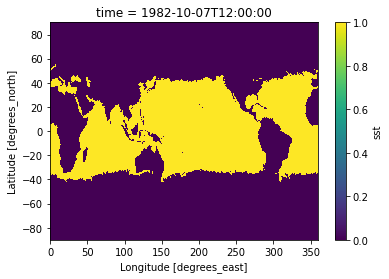

In [33]:
(sst > 15).isel(time=0).plot()

:::{admonition} 📝 Check your understanding
:class: tip

Create a plot that shows where sst is above 10 degrees.

:::

Masking values with `xr.where()`

Another common kind of data manipulation is to want to give data cells new values based on their old values. For that we will use [`xr.where()`](https://xarray.pydata.org/en/stable/generated/xarray.where.html).

`xr.where()` takes at least three arguments:

> `xr.where(condition, true, false)`

- `condition` should be any type of boolean statement like above that returns a bunch of True/False
- `true` is what xarray should put into any place that has a True value.

Optionally, you can also add a third argument describing what would happen should happen to the places where the `condition` array is False.

**Note** better to go with the method version of .where ? https://xarray.pydata.org/en/v2022.03.0/generated/xarray.Dataset.where.html 


In this example, we see that anywhere that `sst` is greater than 20, xarray will put the word "warm".  All other places it will put the word "cold".

In [20]:
xr.where(sst > 20, "warm", "cold")

<xarray.DataArray 'sst' (time: 1, lat: 720, lon: 1440)>
array([[['cold', 'cold', 'cold', ..., 'cold', 'cold', 'cold'],
        ['cold', 'cold', 'cold', ..., 'cold', 'cold', 'cold'],
        ['cold', 'cold', 'cold', ..., 'cold', 'cold', 'cold'],
        ...,
        ['cold', 'cold', 'cold', ..., 'cold', 'cold', 'cold'],
        ['cold', 'cold', 'cold', ..., 'cold', 'cold', 'cold'],
        ['cold', 'cold', 'cold', ..., 'cold', 'cold', 'cold']]],
      dtype='<U4')
Coordinates:
  * time     (time) datetime64[ns] 2022-03-04T12:00:00
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9

In [74]:
xr.where(sst < 0, np.nan, sst)

<xarray.DataArray 'sst' (time: 1, lat: 720, lon: 1440)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * time     (time) datetime64[ns] 1982-10-07T12:00:00

Notice that the conditional doesn't have to be data from the original dataset - it could be one of its coordinates, or even a totally different dataset of the same shape.

In [24]:
masked = xr.where(sst.lat > 60, 0, sst)

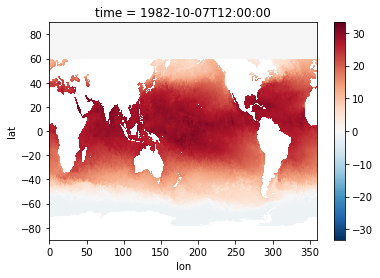

In [25]:
masked.isel(time=0).plot()